In [83]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.optimize as sco
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [84]:
#Set the stock symbols, data source, and time range

stocks = ['GOOGL', 'TM', 'KO', 'PEP', 'AGL.AX', 'HMC', 'QBE.AX', 'TLS.AX', 'BHP.AX', 'TEAM']
numAssets = len(stocks)
source = 'yahoo'
start = '2010-01-01'
end = '2019-01-01'

data = pd.DataFrame()

#Retrieve stock price data and save just the dividend adjusted closing prices

for symbol in stocks:
        data[symbol] = pdr.DataReader(symbol, data_source=source, start=start, end=end)['Adj Close']


In [85]:
data

,GOOGL,TM,KO,PEP,AGL.AX,HMC,QBE.AX,TLS.AX,BHP.AX,TEAM
Date,,,,,,,,,,
2009-12-31,310.300293,65.259682,20.064037,46.259422,NaN,26.524830,NaN,NaN,NaN,NaN
2010-01-04,313.688690,65.973053,20.078125,46.594196,8.979420,27.142963,17.052418,1.872442,28.947420,NaN
2010-01-05,312.307312,64.957253,19.835236,47.157219,9.029819,26.955179,16.789970,1.839783,29.308596,NaN
2010-01-06,304.434448,65.786949,19.828201,46.685482,8.947899,26.720442,16.487141,1.807124,29.275171,NaN
2010-01-07,297.347351,64.972763,19.778913,46.388771,8.910067,26.266617,16.668840,1.839783,29.174816,NaN
2010-01-08,301.311310,66.500336,19.412844,46.236595,NaN,26.869104,NaN,NaN,NaN,NaN
2010-01-11,300.855865,66.841522,19.807072,46.183334,8.903751,27.009941,16.453497,1.801681,29.087925,NaN
2010-01-12,295.535522,69.400421,20.021799,46.830051,8.966784,28.066244,16.487141,1.818011,28.840418,NaN
2010-01-13,293.838837,69.160042,20.074598,47.210476,8.985735,28.504412,16.534252,1.823454,29.281898,NaN


Text(0,0.5,'price in $')

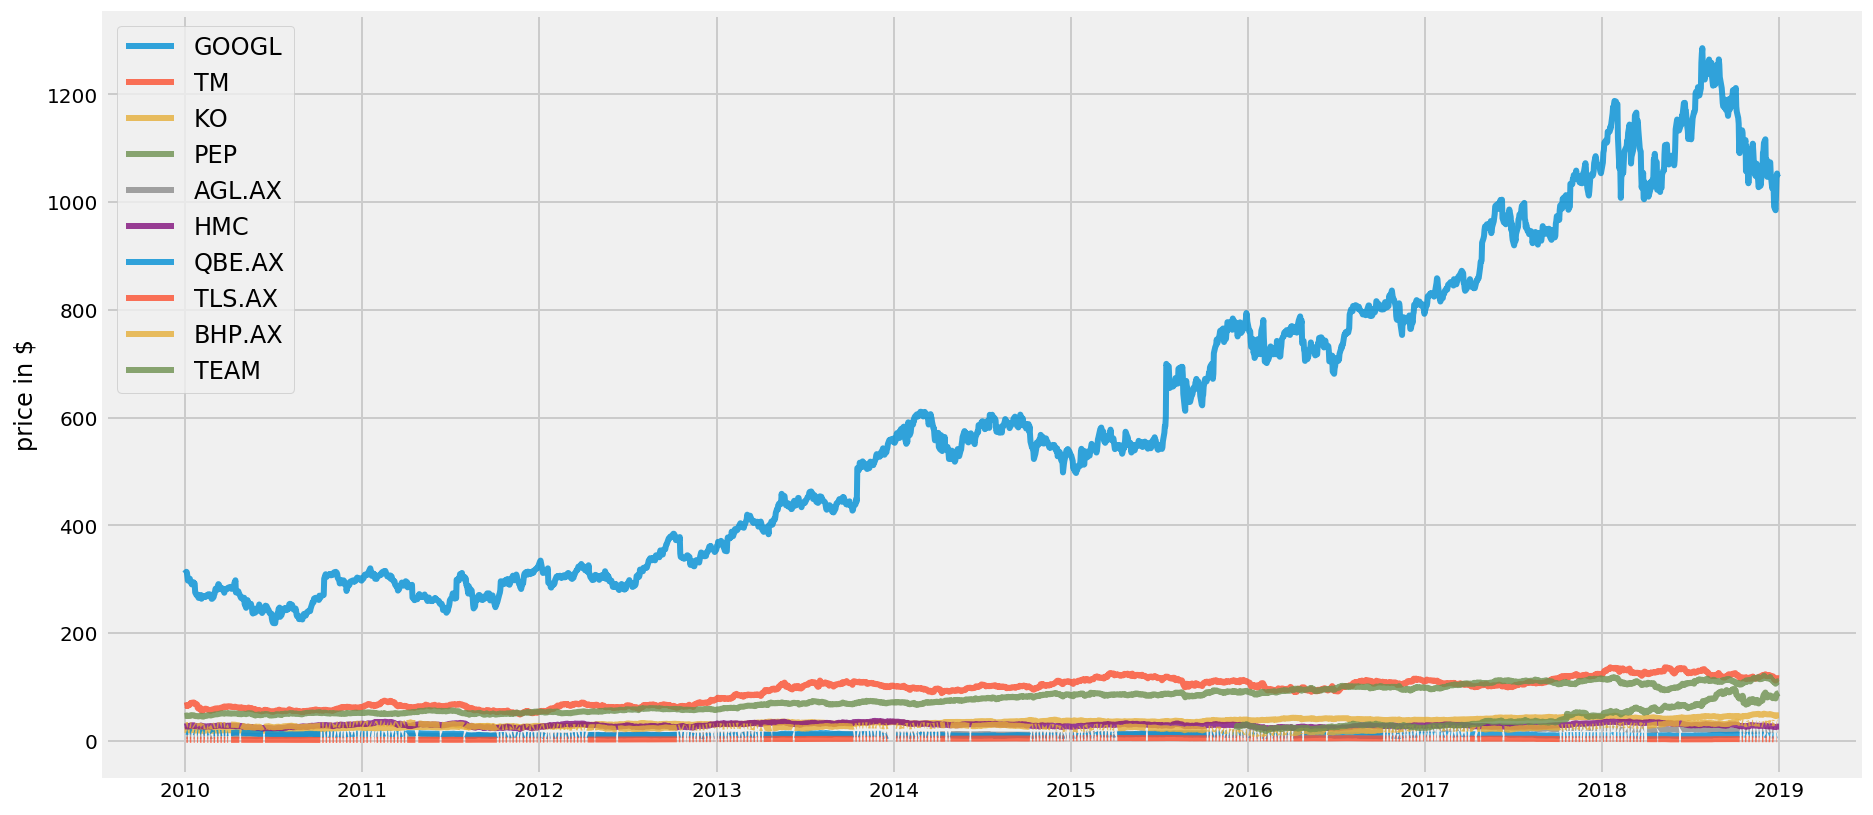

In [86]:
plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Another way to plot this is plotting daily returns (percent change compared to the day before). By plotting daily returns instead of actual prices, we can see the stocks’ volatility.

Text(0,0.5,'daily returns')

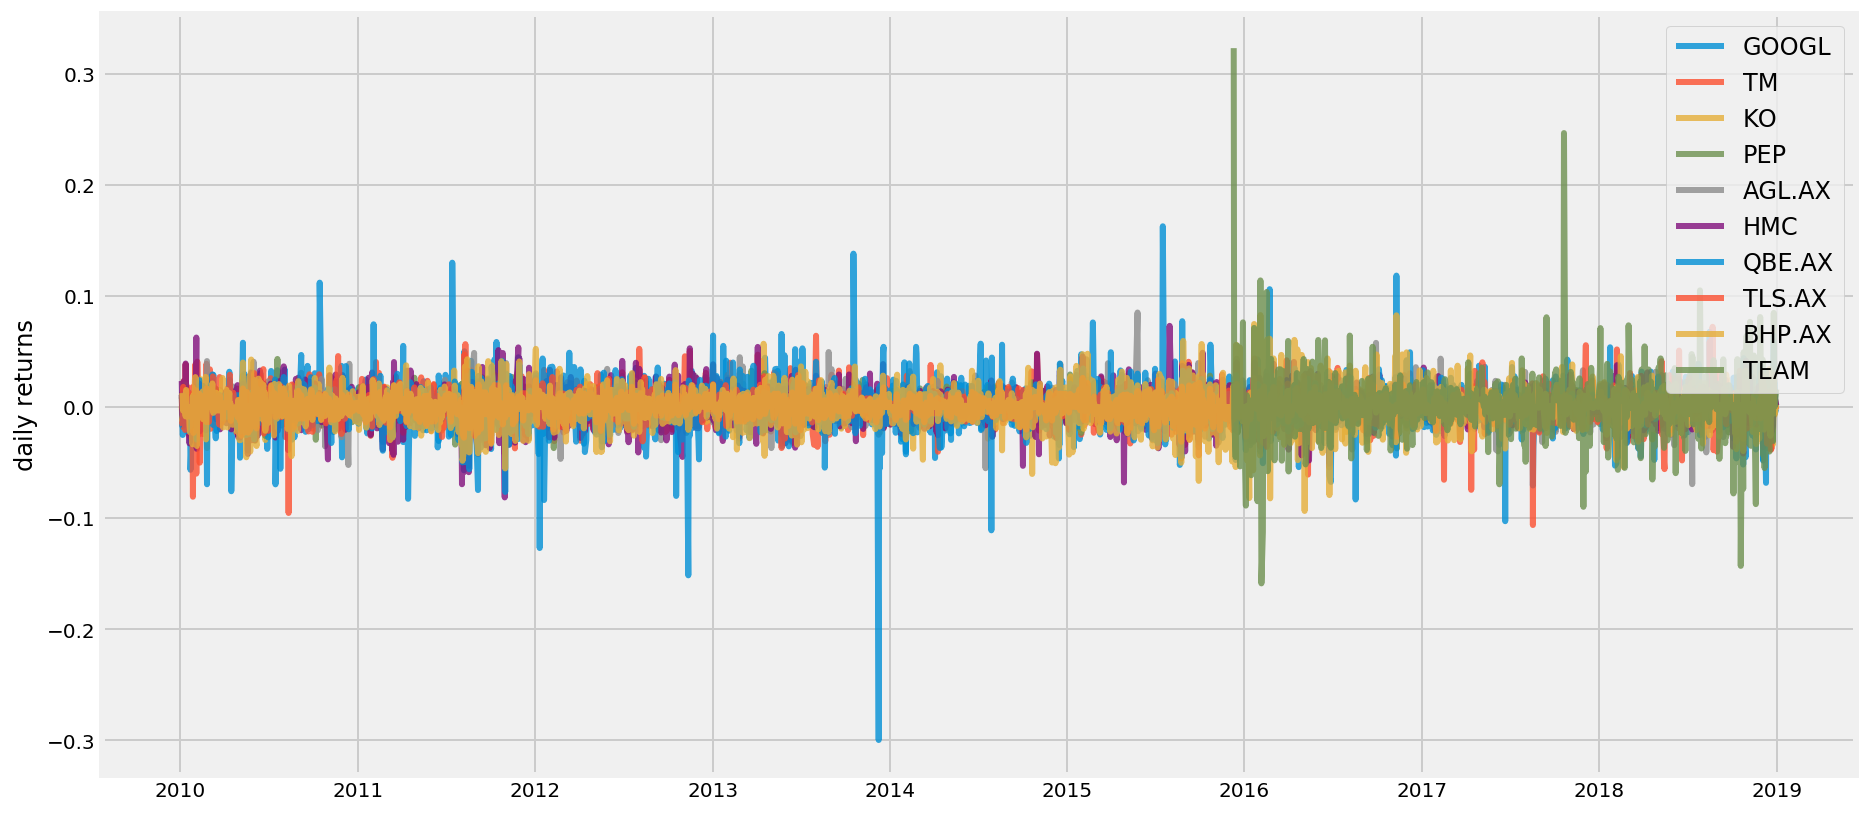

In [87]:
returns = data.pct_change()

plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

# Random Portfolio Generation

“portfolio_annualised_performance” function will calculate the returns and volatility, and to make it as an annualised calculation I take into account 252 as the number of trading days in one year. “random_portfolios” function will generate portfolios with random weights assigned to each stock, and by giving num_portfolios argument, you can decide how many random portfolios you want to generate.

In [88]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights )*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate, stocks_list):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks_list))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

**Sharpe ratio**. The ratio describes how much excess return you are receiving for the extra volatility that you endure for holding a riskier asset. The Sharpe ratio can be expressed in below formula.

$$(\bar{r}_p-r_f)/\sigma_p\;,$$
where
* $\bar{r}_p$ is the expected portfolio return
* $r_f$ is the risk-free rate
* $\sigma_p$ is the portfolio standard deviation


In order to understand the Sharpe ratio, it is essential to understand the broader concept of risk-adjusted return. Risk-adjusted return refines an investment’s return by measuring how much risk is involved in producing that return, which is generally expressed as a number or rating. There could be a number of different methods of expressing risk-adjusted return, and the Sharpe ratio is one of them.

We will generate 25,000 random portfolios. Finally, the risk-free rate has been taken from U.S. Department of The Treasury. The rate of 1.78% is the 52week treasury bill rates at the start of 2018. The rationale behind this is that the historical price data is from 2016~2017, and if I assume that I implement this analysis at the start of 2018, the most updated Treasury bill rate is from the start of 2018. And I also chose 52weeks treasury bill rates to match with the annualised return and risk I calculated.

In [89]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

Let me briefly explain what below function is doing. First, it generates random portfolio and gets the results (portfolio returns, portfolio volatility, portfolio Sharpe ratio) and weights for the corresponding result. Then by locating the one with the highest Sharpe ratio portfolio, it displays maximum Sharpe ratio portfolio as red star sign. And does similar steps for minimum volatility portfolio, and displays it as a green star on the plot. All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio. Bluer, higher the Sharpe ratio.

In [90]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, stocks_list):
        
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate, stocks_list)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.13


            GOOGL    TM     KO    PEP  AGL.AX   HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   2.12  8.89  18.61  14.73   19.79  1.16    0.13   11.37    2.59   

             TEAM  
allocation  20.61  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.11
Annualised Volatility: 0.1


            GOOGL    TM     KO    PEP  AGL.AX   HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   2.31  1.68  25.29  17.57   16.46  2.19    5.69   16.41    8.47   

            TEAM  
allocation  3.92  


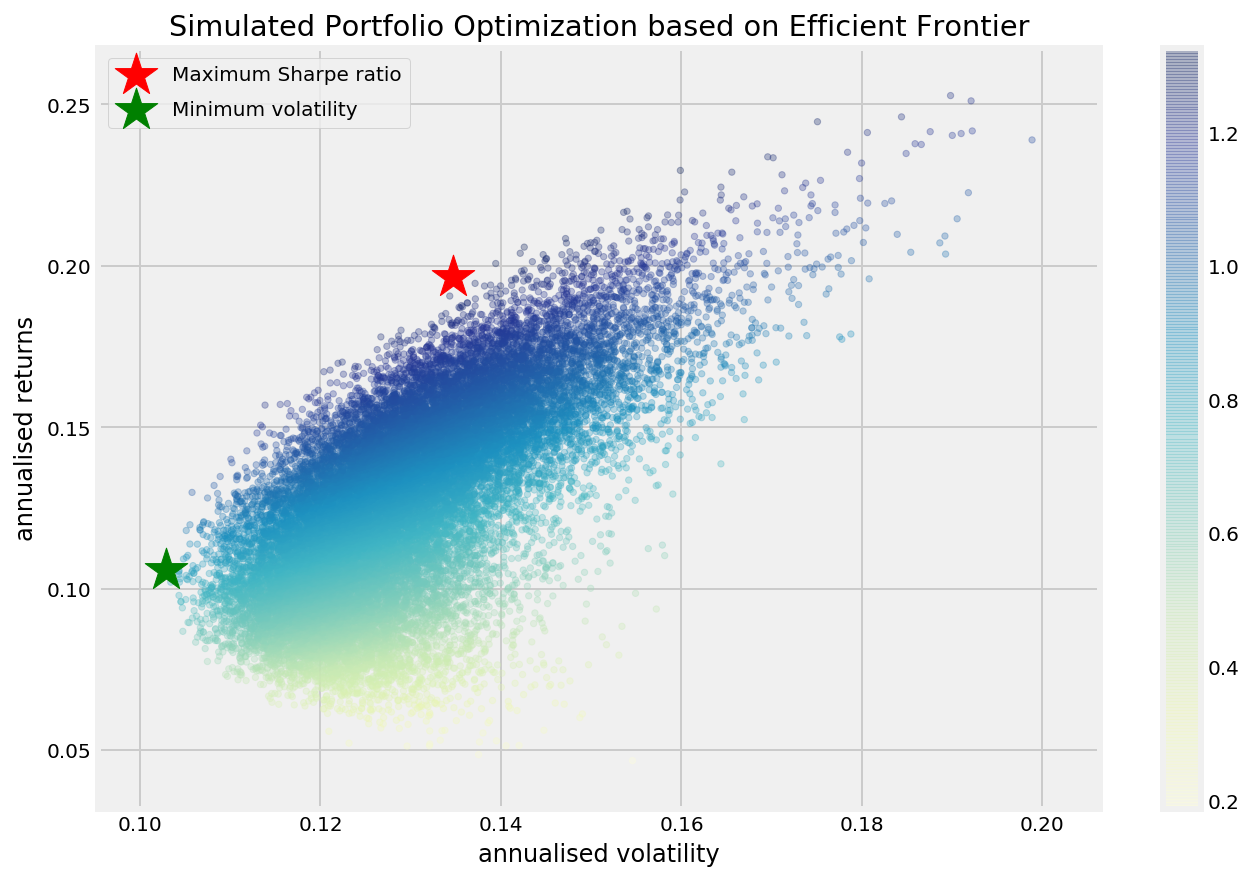

In [91]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, stocks)

If we are willing to take higher risk for higher return, one that gives us the best risk-adjusted return is the one with maximum Sharpe ratio.

# Getting the Portfolio with Maximum Sharpe Ratio

Below functions are to get the maximum Sharpe ratio portfolio. In Scipy’s optimize function, there’s no ‘maximize’, so as an objective function you need to pass something that should be minimized. That is why the first “neg_sharpe_ratio” is computing the negative Sharpe ratio.

In [92]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

The above constraint is saying that sum of x should be equal to 1. You can think of the ‘fun’ part construction as ‘1’ on the right side of equal sign has been moved to the left side of the equal sign.

np.sum(x) == 1 has become np.sum(x)-1

It simply means that the sum of all the weights should be equal to 1.

“bounds” is giving another limit to assign random weights, by saying any weight should be inclusively between 0 and 1. You cannot give minus budget allocation to a stock or more than 100% allocation to a stock.

In [93]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Calculate the Minimum Volatility Portfolio

In [94]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

# Calculate Efficient Frontier

As I already mentioned above we can also draw a line which depicts where the efficient portfolios for a given risk rate should be. This is called “efficient frontier”. Below I define other functions to compute efficient frontier. The first function “efficient_return” is calculating the most efficient portfolio for a given target return, and the second function “efficient_frontier” will take a range of target returns and compute efficient portfolio for each return level.

In [95]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [96]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, stocks_list):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate, stocks_list)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.15


            GOOGL   TM     KO    PEP  AGL.AX  HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   0.83  0.0  17.08  29.59   21.25  0.0     0.0    4.49     0.0   

             TEAM  
allocation  26.75  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.1
Annualised Volatility: 0.1


            GOOGL    TM     KO   PEP  AGL.AX  HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   1.35  5.67  19.57  26.7   17.43  0.0    3.52   19.46    3.75   

            TEAM  
allocation  2.56  


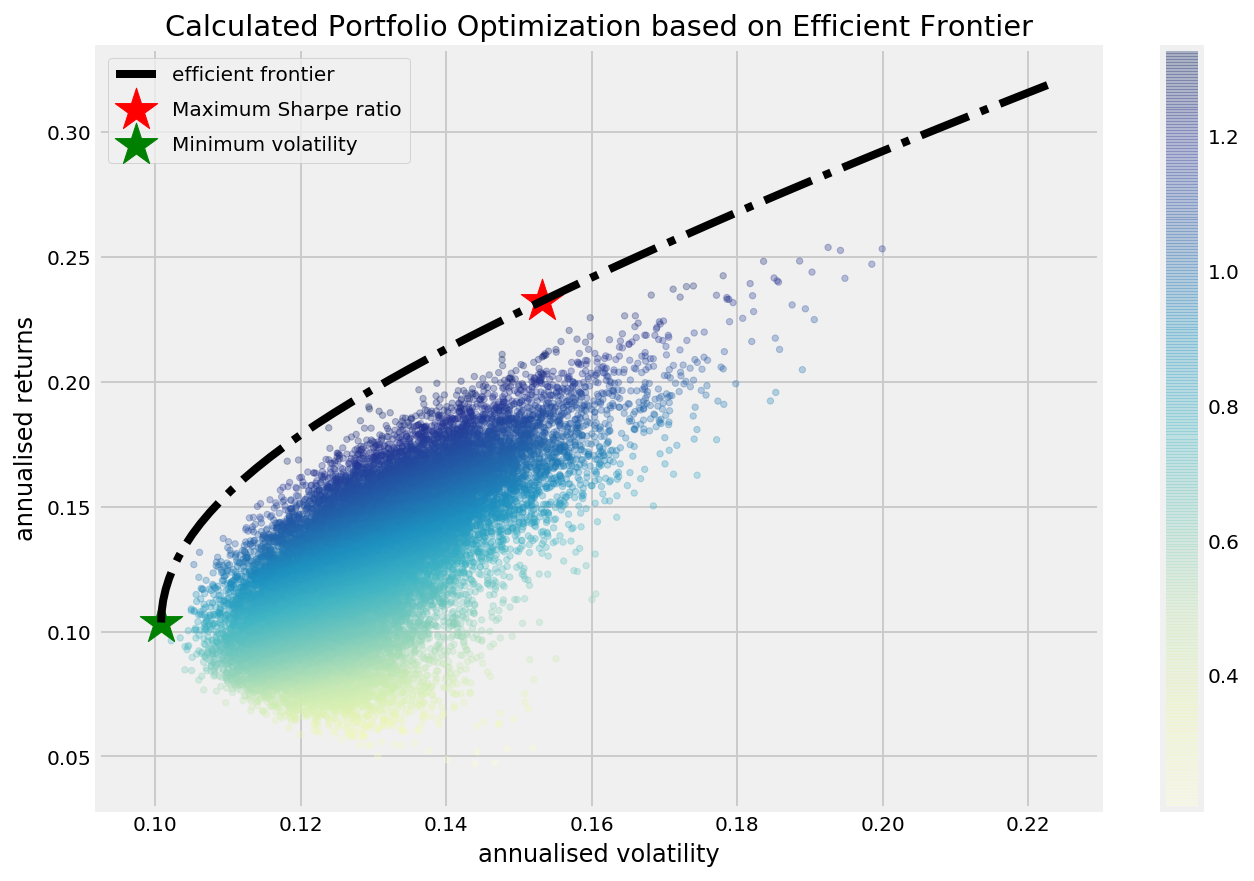

In [97]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, stocks)

Instead of plotting every randomly generated portfolio, we can plot each individual stocks on the plot with the corresponding values of each stock’s annual return and annual risk. This way we can see and compare how diversification is lowering the risk by optimising the allocation.

In [98]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(data.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(data.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.15


            GOOGL   TM     KO    PEP  AGL.AX  HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   0.83  0.0  17.08  29.59   21.25  0.0     0.0    4.49     0.0   

             TEAM  
allocation  26.75  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.1
Annualised Volatility: 0.1


            GOOGL    TM     KO   PEP  AGL.AX  HMC  QBE.AX  TLS.AX  BHP.AX  \
allocation   1.35  5.67  19.57  26.7   17.43  0.0    3.52   19.46    3.75   

            TEAM  
allocation  2.56  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

GOOGL : annuaised return 0.16 , annualised volatility: 0.24
TM : annuaised return 0.09 , annualised volatility: 0.21
KO : annuaised return

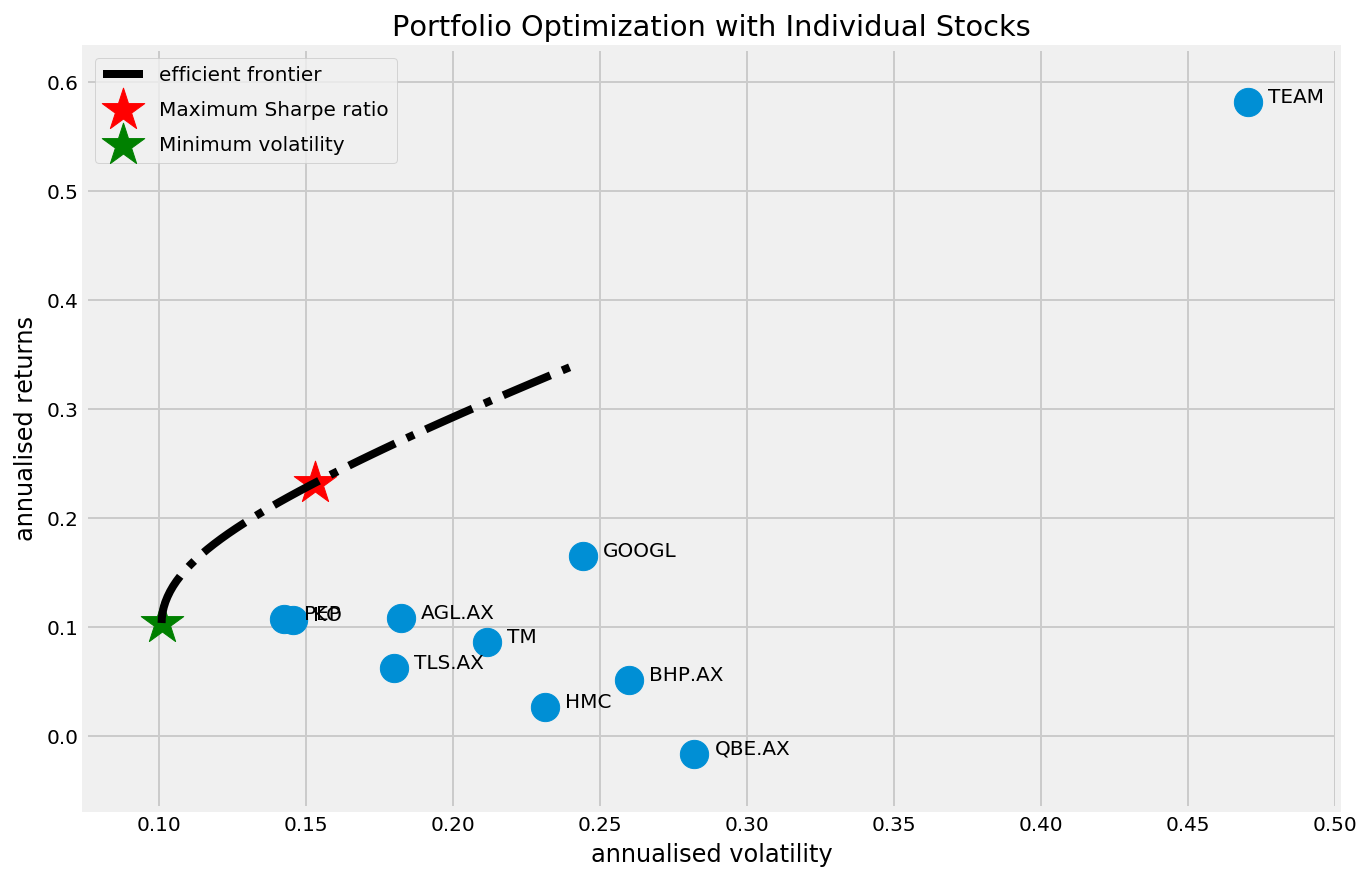

In [99]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)